# Em construção!! 

# Gradiente Descendente
---

O gradiente descendente é um algoritmo de otimização utilizado para minimizar uma função movendo-se iterativamente na direção do gradiente negativo, sendo, por consequência, utilizando em maioria quando os parâmetros não podem ser calculados analiticamente.

Considere a seguinte função de custo:

$$ L(a,b) = \frac{1}{N} \sum_{i=1}^{n} (y_{i} - (ax_{i}+b))^2 $$

A função de custo pode ser calculada como:

$$ 
\nabla(a,b) = 
  \left[
    \begin{array}{cc}
     \frac{dL}{da}\\
     \frac{dL}{db}
    \end{array}
  \right]
=
  \left[
    \begin{array}{cc}
     \frac{1}{N} \sum -2x_i(y_i - (ax_i + b)) \\ 
     \frac{1}{N} \sum -2(y_i - (ax_i + b))
    \end{array}
  \right]
$$

No espaço $\Re^n$, o vetor gradiente aponta na direção de aumento/redução da função $L(x)$, sendo essa informação de grande utilidade para explorar o espaço em busca da solução do problema de otimização.

No caso acima, itera-se pelos dados utiliazndo valores atualizados de **a** e **b**, calculando as derivadas parciais. O novo gradiente nos direciona ao próximo ponto para atualizar os parâmetros, sendo que o tamanho do passo é dado pela taxa de aprendizagem (*learning rate*).

Referências: [1](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html), [2](https://machinelearningmastery.com/gradient-descent-for-machine-learning/), [3](http://cursos.leg.ufpr.br/ML4all/apoio/Gradiente.html), [4](https://www.edusp.com.br/livros/programacao-matematica-para-otimizacao-de-processos/)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Considere a seguinte simples função quadrática:

$$ L(x) = x^2 $$

Nota-se pela figura abaixo que temos um ponto de mínimo em (0,0):

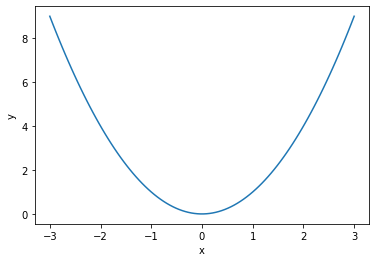

In [ ]:
x = np.linspace(-3,3,100)
y = x**2

plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("custo")
plt.show()

Temos que sua derivada primeira é:

$$ \nabla{L} = 2x $$

No algoritmo de atualização abaixo, iniciamos no ponto máximo da função, e andamos subtraindo o gradiente até que ocorra convergência i.e. até que a diferença entre o ponto atual e o próximo seja inferior à tolerância:



taxa de aprendizado: .1
tolerância: .05
Mínimo pelo gradiente em 0.027200830941329163


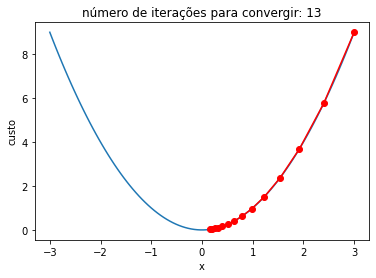

In [ ]:
l_rate = float(input("Taxa de aprendizado: "))
tolerance = float(input("Tolerância: "))

x0 = np.max(x)
x_gd = [x0]
c = 0

while True:
    
    aux = x0
    grad = l_rate*(2*x0)
    x0 -= grad
    
    x_gd.append(x0)
    
    c += 1
    
    if abs(aux - x0) <= tolerance:
        break
    
y_gd = [el**2 for el in x_gd]

print(f"Mínimo pelo gradiente em {y_gd[-1]}")

plt.plot(x, y)
plt.plot(x_gd, y_gd, "-o", color="r")
plt.xlabel("x")
plt.ylabel("custo")
plt.title(f"número de iterações para convergir: {c}")
plt.show()

# Matrizes Jacobiana e Hessiana

Em problemas de otimização, porém, muitas vezes encontram-se restrições diversas que devem ser satisfeitas na busca do ponto ótimo da função objetivo.

Nesse contexto, faz-se importante comentar sobre a matriz jacobiana, ou jacobiano, que nada mais é que a matrix de derivadas de primeira ordem das $m$ funções de restrição:

$$ J(f(x)) = 
  \left[ 
    \begin{array}{cc} 
      \frac{\partial{f_1}}{\partial{x_1}} & \frac{\partial{f_1}}{\partial{x_2}} & \cdots & \frac{\partial{f_1}}{\partial{x_n}} \\
      \frac{\partial{f_2}}{\partial{x_1}} & \frac{\partial{f_2}}{\partial{x_2}} & \cdots & \frac{\partial{f_2}}{\partial{x_n}} \\
      \vdots & \vdots & \ddots & \vdots \\
      \frac{\partial{f_m}}{\partial{x_1}} & \frac{\partial{f_m}}{\partial{x_2}} & \cdots & \frac{\partial{f_m}}{\partial{x_n}}
    \end{array}
  \right]
$$

Além das derivadas parciais de primeira ordem, visando calcular a concavidade de uma função,é interessante também apresentar também o conceito de matriz hessiana, a qual é uma matriz quadrada de ordem $n$ composta pelas derivadas parciais de segunda ordem, como demonstrado a seguir:

$$ H(f(x)) = 
  \left[ 
    \begin{array}{cc} 
      \frac{\partial^2{f_1}}{\partial{x_1^2}} & \frac{\partial^2{f_1}}{\partial{x_1}\partial{x_2}} & \cdots & \frac{\partial^2{f_1}}{\partial{x_1}\partial{x_n}} \\
      \frac{\partial^2{f_2}}{\partial{x_1}\partial{x_2}} & \frac{\partial^2{f_2}}{\partial{x_2^2}} & \cdots & \frac{\partial^2{f_2}}{\partial{x_2}\partial{x_n}} \\
      \vdots & \vdots & \ddots & \vdots \\
      \frac{\partial^2{f_m}}{\partial{x_1}\partial{x_n}} & \frac{\partial^2{f_m}}{\partial{x_2}\partial{x_n}} & \cdots & \frac{\partial^2{f_m}}{\partial{x_n^2}}
    \end{array}
  \right]
$$

Analisando-se a concavidade de uma função entre um intervalo $x_a \le x \le x_b $, temos que:

- se $\frac{\partial^2{f}}{\partial{x^2}} > 0$ a função é estritamente convexa no intervalo; 
- se $\frac{\partial^2{f}}{\partial{x^2}} \ge 0$ a função é convexa no intervalo;
- se $\frac{\partial^2{f}}{\partial{x^2}} < 0$ a função é estritamente côncava no intervalo;
- se $\frac{\partial^2{f}}{\partial{x^2}} > 0$ a função é côncava no intervalo;

Tal concavidade é importante, como dito anteriormente, na busca de um ponto ótimo no espaço para solução do problema de otimização.

Referência: [4](https://www.edusp.com.br/livros/programacao-matematica-para-otimizacao-de-processos/)